In [1]:
tasmia = "In the name of Allah, the most Benoficient, the most Merciful!"
print(tasmia)

In the name of Allah, the most Benoficient, the most Merciful!


### Import Libraries

In [489]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

### Import Dataset

In [490]:
df = pd.read_csv("book_sales.csv", index_col = "Date", parse_dates = ["Date"])
df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


**Create Days Column**

In [491]:
df["Days"] = np.arange(len(df))
df.head()

,Paperback,Hardcover,Days
Date,,,
2000-04-01,199,139,0
2000-04-02,172,128,1
2000-04-03,111,172,2
2000-04-04,209,139,3
2000-04-05,161,191,4


**Regression Plot of Paperback Book Sales Data**

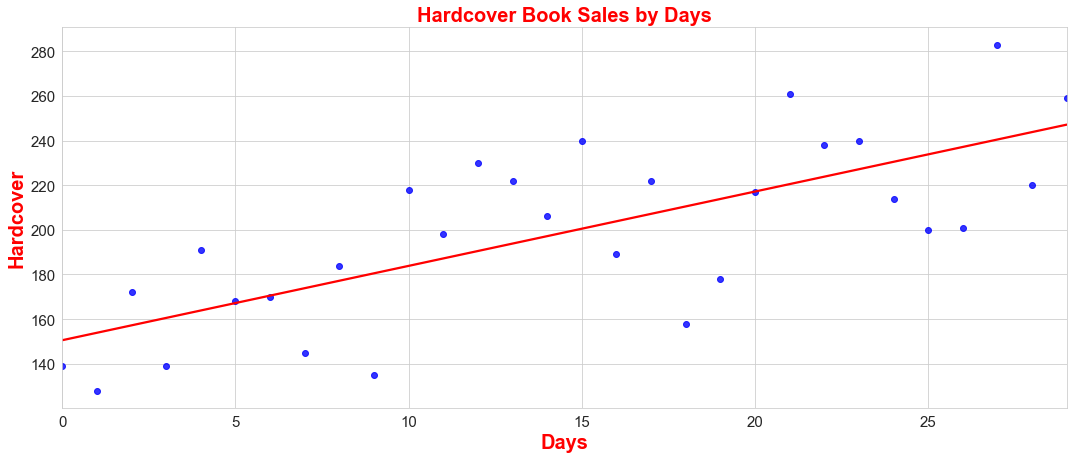

In [492]:
plt.figure(figsize = (18, 7))
sns.regplot(x = "Days", 
            y = "Hardcover", 
            data = df, 
            ci = None,
            scatter_kws=dict(color="blue"),
            color = "red")

plt.title("Hardcover Book Sales by Days", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", size = 20, color = "red", weight = "bold")
plt.ylabel("Hardcover", size = 20, color = "red", weight = "bold")
plt.show()

**Last Day Sales Column (Shift)**

In [493]:
df["Last Day Hardcover Sale"] = df["Hardcover"].shift(1)
df[:5]

,Paperback,Hardcover,Days,Last Day Hardcover Sale
Date,,,,
2000-04-01,199,139,0,NaN
2000-04-02,172,128,1,139.0
2000-04-03,111,172,2,128.0
2000-04-04,209,139,3,172.0
2000-04-05,161,191,4,139.0


**Lag Plot of Hardcover Sales**

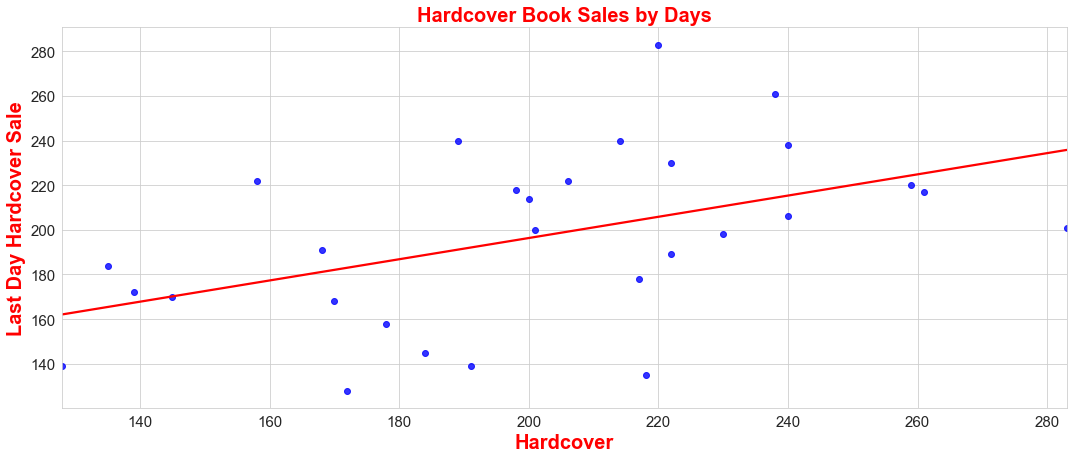

In [494]:
plt.figure(figsize = (18, 7))
sns.regplot(x = "Hardcover",
            y = "Last Day Hardcover Sale",
            data = df, 
            ci = None,
            color = "red",
            scatter_kws=dict(color="blue"))
plt.title("Hardcover Book Sales by Days", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Hardcover", size = 20, color = "red", weight = "bold")
plt.ylabel("Last Day Hardcover Sale", size = 20, color = "red", weight = "bold")
plt.show()

### Tunnel Traffic

In [495]:
tt = pd.read_csv("tunnel.csv", index_col = "Day", parse_dates = ["Day"])
tt.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [496]:
tt["Days"] = np.arange(len(tt))
tt[:5]

,NumVehicles,Days
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


**Linear Regression**

In [497]:
X = tt[["Days"]]

y = tt["NumVehicles"]

model = LinearRegression()

model.fit(X, y)

pred = model.predict(X)
pd.DataFrame({"Actual": y,
              "Predicted": pred}).sample(10)

,Actual,Predicted
Day,,
2004-03-05,114861,100988.387536
2004-07-02,120623,103665.584030
2004-10-21,116896,106162.800928
2003-11-18,102281,98558.662986
2005-11-03,122053,114666.836852
2004-02-28,106147,100853.402839
2005-11-08,113682,114779.324100
2004-04-07,115853,101730.803370
2005-04-11,112007,110032.362248


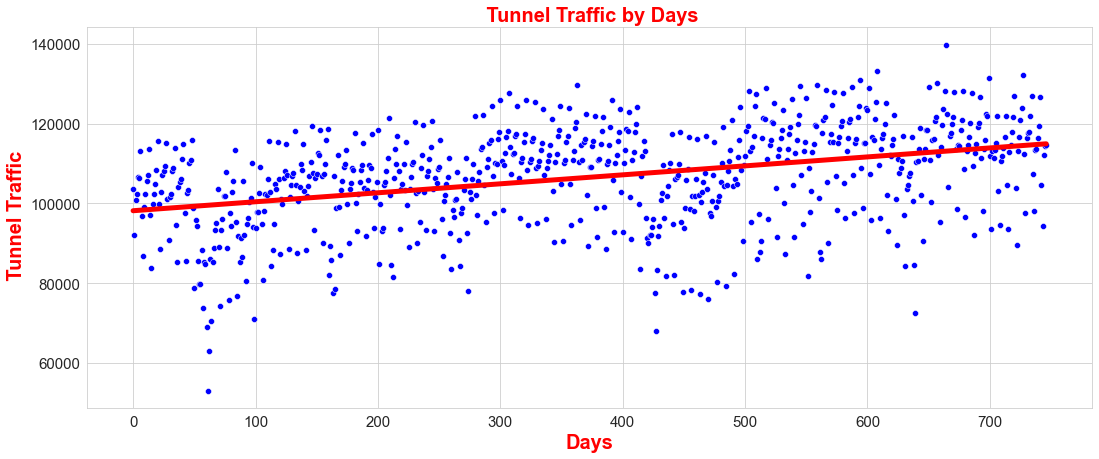

In [498]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Days", y = "NumVehicles", data = tt, color = "blue")
sns.lineplot(x = "Days", y = pred, data = tt, color = "red", linewidth = 5)
plt.title(" Tunnel Traffic by Days", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", size = 20, color = "red", weight = "bold")
plt.ylabel(" Tunnel Traffic", size = 20, color = "red", weight = "bold")
plt.show()

**Lag Feature**

In [499]:
tt["Lag"] = tt["NumVehicles"].shift(1)
tt[:5]

,NumVehicles,Days,Lag
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [500]:
tt = tt.dropna()
tt[:3]

,NumVehicles,Days,Lag
Day,,,
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0


In [501]:
X = tt[["Lag"]]

y = tt["NumVehicles"]

model = LinearRegression()

model.fit(X, y)

pred = model.predict(X)
pd.DataFrame({"Actual": y,
              "Predicted": pred}).sample(10)

,Actual,Predicted
Day,,
2003-12-15,102585,95366.278265
2004-09-12,96428,106501.005277
2005-10-31,116393,101811.969845
2004-04-20,105724,104880.255476
2004-05-03,102423,99382.177559
2004-01-09,103527,100404.939436
2004-04-18,87171,102554.924538
2004-07-23,107933,103616.059972
2005-04-26,115921,109850.164024


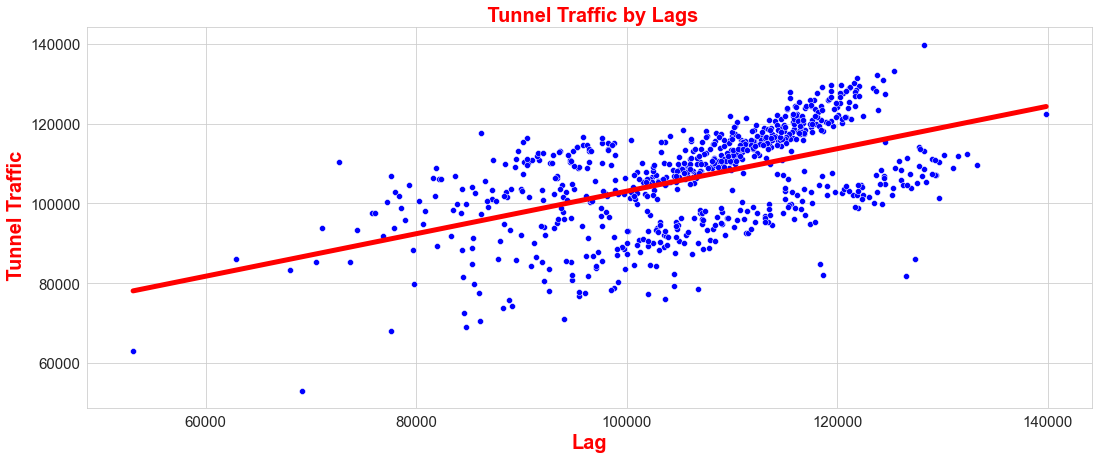

In [502]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Lag", y = "NumVehicles", data = tt, color = "blue")
sns.lineplot(x = "Lag", y = pred, data = tt, color = "red", linewidth = 5)
plt.title(" Tunnel Traffic by Lags", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Lag", size = 20, color = "red", weight = "bold")
plt.ylabel(" Tunnel Traffic", size = 20, color = "red", weight = "bold")
plt.show()

**Moving Average**

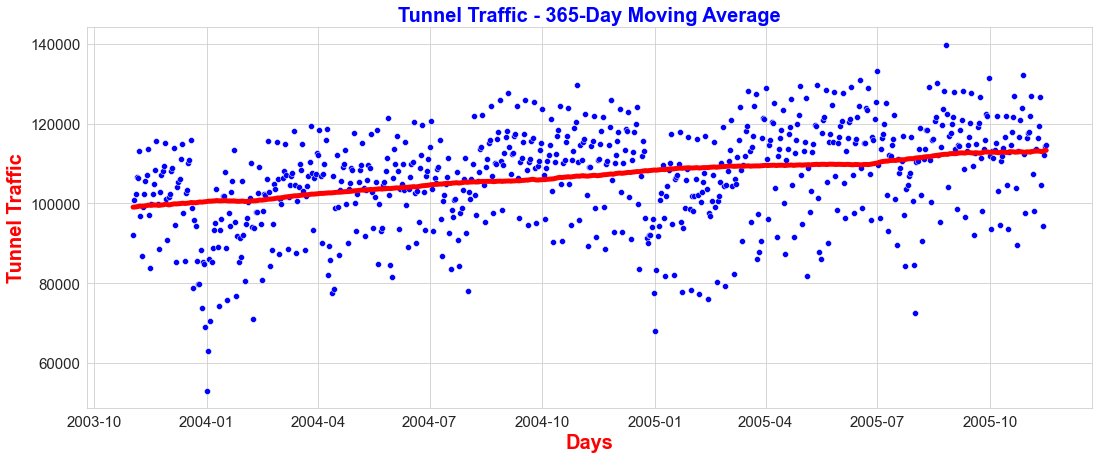

In [503]:
moving_average = tt["NumVehicles"].rolling(window = 365,
                                           center = True,
                                           min_periods = 183).mean()

plt.figure(figsize = (18, 7))
sns.scatterplot(x = tt.index, y = "NumVehicles", data = tt, color = "blue")
sns.lineplot(x = tt.index, y = moving_average, color = "red", linewidth = 5)
plt.title("Tunnel Traffic - 365-Day Moving Average", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", size = 20, color = "red", weight = "bold")
plt.ylabel("Tunnel Traffic", size = 20, color = "red", weight = "bold")
plt.show()

**Forecasting for 

In [504]:
X = tt[["Days"]]
y = tt["NumVehicles"]

model = LinearRegression()

model.fit(X, y)

fore_X = pd.DataFrame({"Days": np.arange(747, 807)}, 
                      index = pd.date_range('2005-11-17', periods=60))


pred_y = model.predict(X)
fore_y = model.predict(fore_X)

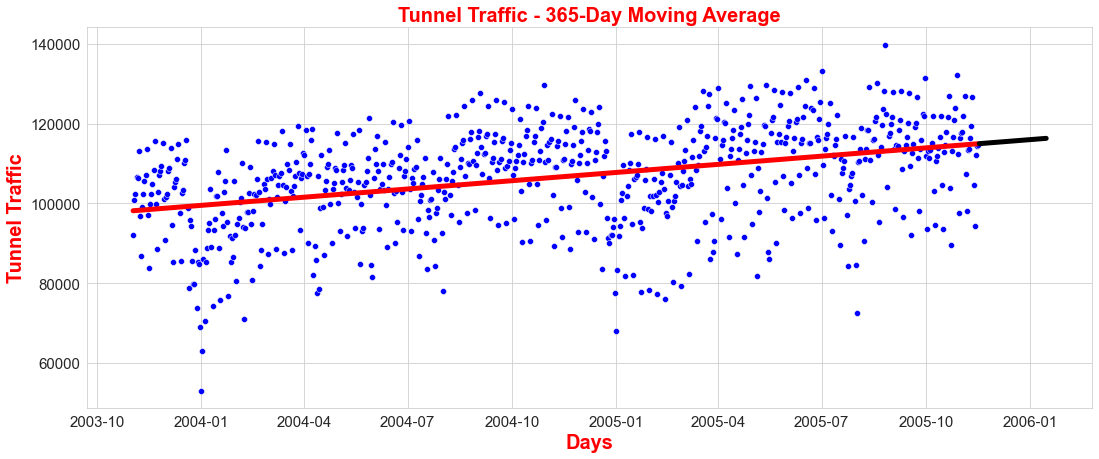

In [505]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = tt.index, y = "NumVehicles", data = tt, color = "blue")
sns.lineplot(x = tt.index, y = pred_y, color = "red", linewidth = 5)
sns.lineplot(x = fore_X.index, y = fore_y, color = "black", linewidth = 5)

plt.title("Tunnel Traffic - 365-Day Moving Average", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Days", size = 20, color = "red", weight = "bold")
plt.ylabel("Tunnel Traffic", size = 20, color = "red", weight = "bold")
plt.show()

### US Retail Sales

In [506]:
df = pd.read_csv("us-retail-sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [507]:
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index(df["Month"])
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,,
1992-01-01,1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,1992-03-01,8475,3669,29682,31684,17984,10608
1992-04-01,1992-04-01,9401,3527,30228,32547,18872,11630
1992-05-01,1992-05-01,9558,3571,31677,32883,20037,12327


In [508]:
del df["Month"]

**US Foods and Beverages Sales**

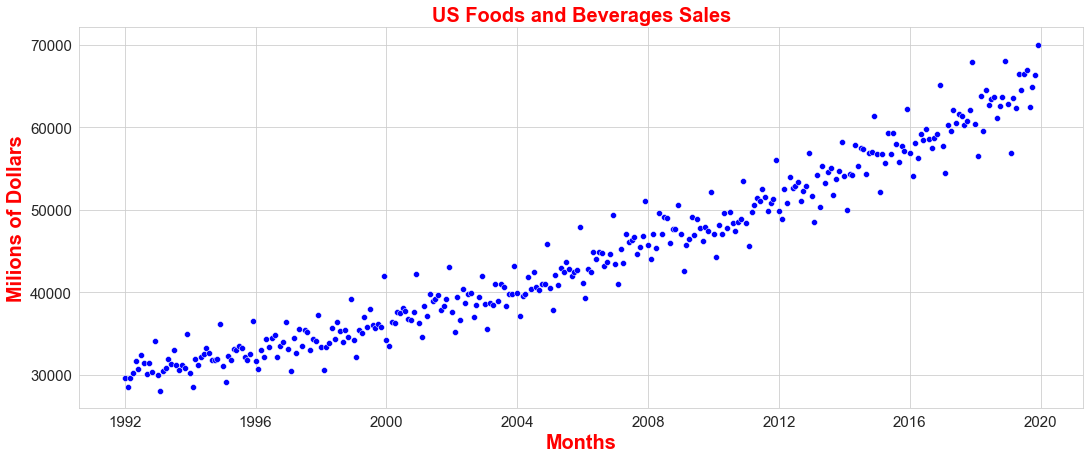

In [509]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "FoodAndBeverage", data = df, color = "blue")

plt.title("US Foods and Beverages Sales", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20, color = "red", weight = "bold")
plt.ylabel("Milions of Dollars", size = 20, color = "red", weight = "bold")
plt.show()

**Moving Average**

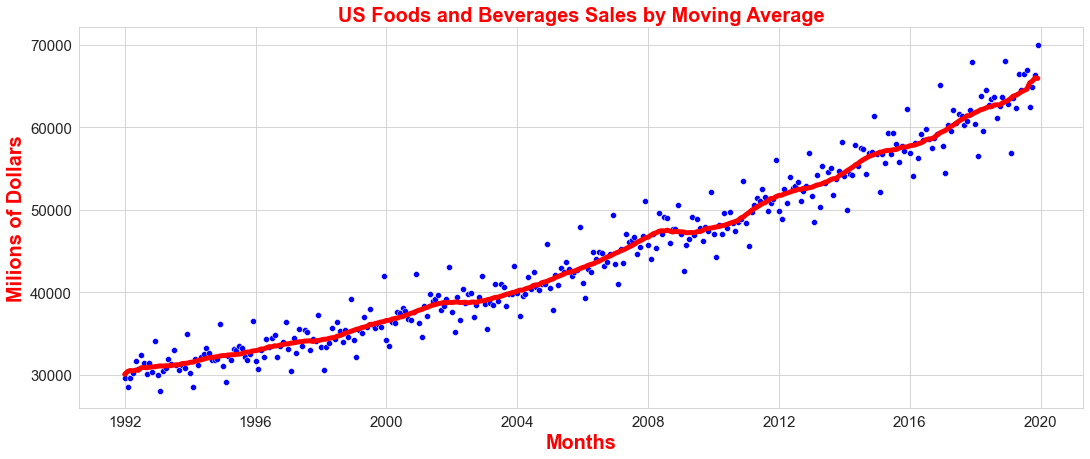

In [510]:
trend = df["FoodAndBeverage"].rolling(window = 12,
                                      center = True,
                                      min_periods = 6).mean()

plt.figure(figsize = (18, 7))
sns.scatterplot(x = df.index, y = "FoodAndBeverage", data = df, color = "blue")
sns.lineplot(x = trend.index, y = trend, linewidth = 5, color = "red")
plt.title("US Foods and Beverages Sales by Moving Average", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20, color = "red", weight = "bold")
plt.ylabel("Milions of Dollars", size = 20, color = "red", weight = "bold")
plt.show()

**Sales**

In [511]:
df_sales = pd.read_csv("train_sales.csv", index_col = "date", parse_dates = ["date"])
df_sales.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [512]:
sales = df_sales.groupby(df_sales.index)["sales"].agg(["mean"])
sales[:5]

,mean
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244


**Average Sales by Date**

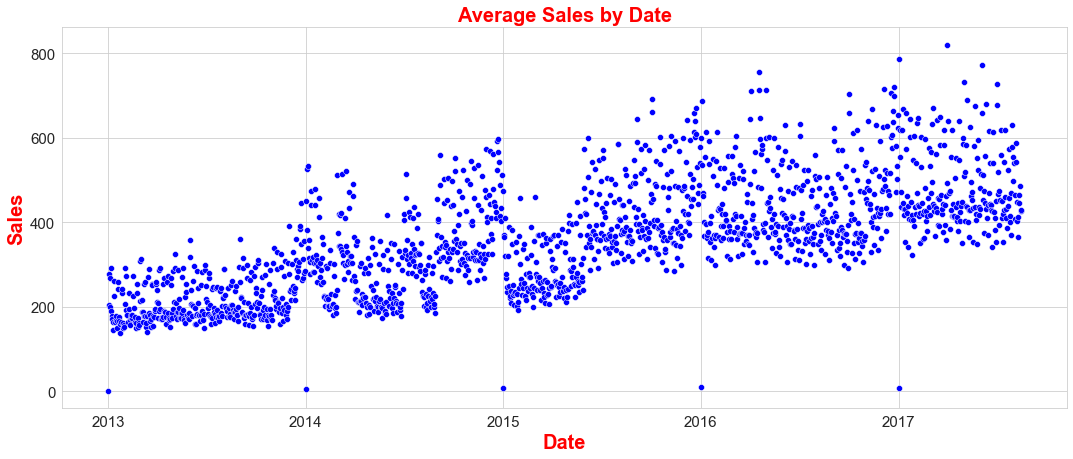

In [513]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = sales.index, y = "mean", data = sales, color = "blue")

plt.title("Average Sales by Date", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()

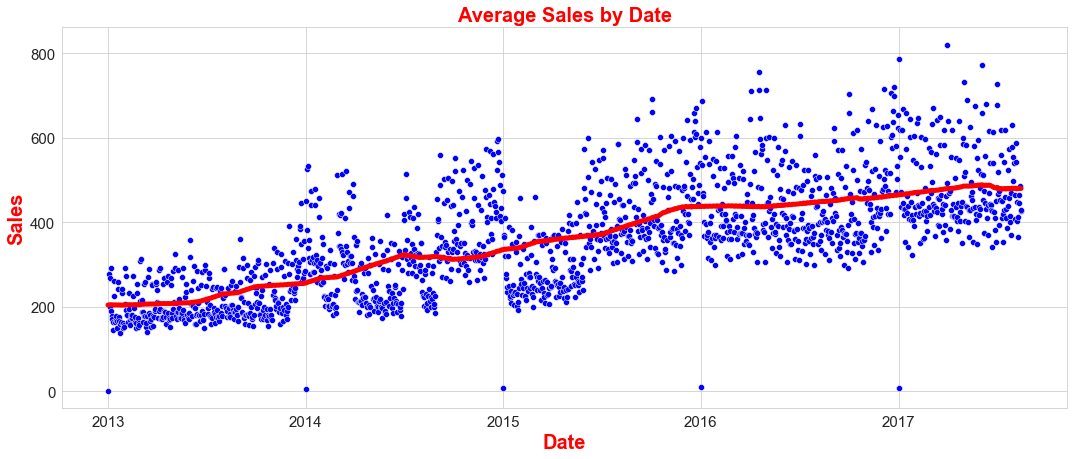

In [514]:
sales_trend = sales.rolling(window = 365,
                            center = True,
                            min_periods = 183).mean()

plt.figure(figsize = (18, 7))
sns.scatterplot(x = sales.index, y = "mean", data = sales, color = "blue")
sns.lineplot(x = sales_trend.index, y = "mean", data = sales_trend, color = "red", linewidth = 5)

plt.title("Average Sales by Date", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()

**Prepare Data for Forecasting**

In [515]:
dp = DeterministicProcess(index=sales.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)
X_fore.index = pd.date_range("2017-08-15", periods = 90)

**Forecasting by Average Sales using Linear Regression**

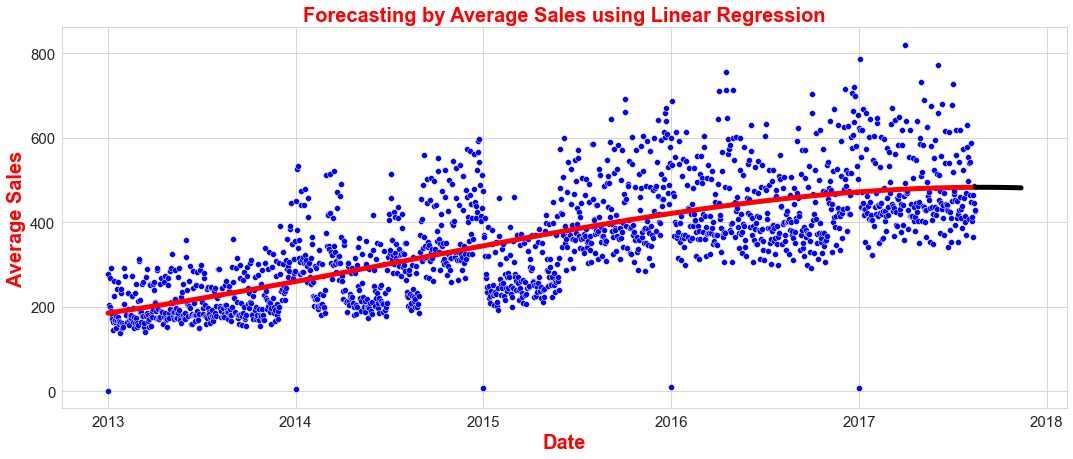

In [516]:
y = sales["mean"]

lr = LinearRegression()

lr.fit(X, y)

pred = lr.predict(X)
for_predict = lr.predict(X_fore)

plt.figure(figsize = (18, 7))
sns.scatterplot(x = sales.index, y = "mean", data = sales, color = "blue")
sns.lineplot(x = sales.index, y = pred, color = "red", linewidth = 5)
sns.lineplot(x = X_fore.index, y = for_predict, color = "black", linewidth = 5)
plt.title("Forecasting by Average Sales using Linear Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Average Sales", size = 20, color = "red", weight = "bold")
plt.show()

### Seasonality

In [517]:
sales["Week"] = sales.index.week
sales["Day of Week"] = sales.index.dayofweek
sales["Month"] = sales.index.month
sales.columns = ["Average Sales", "Week", "Day of Week", "Month"]
sales[:3]

,Average Sales,Week,Day of Week,Month
date,,,,
2013-01-01,1.409438,1,1,1
2013-01-02,278.390807,1,2,1
2013-01-03,202.840197,1,3,1


**Average Sales by Day of Week**

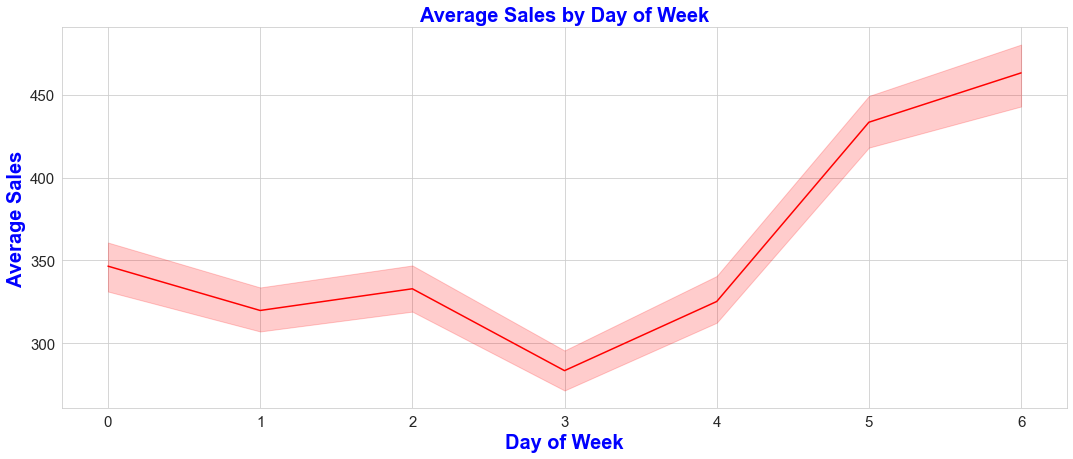

In [518]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Day of Week", y = "Average Sales", data = sales, color = "red")
plt.title("Average Sales by Day of Week", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Day of Week", size = 20, color = "blue", weight = "bold")
plt.ylabel("Average Sales", size = 20, color = "blue", weight = "bold")
plt.show()

**Average Sales by Week**

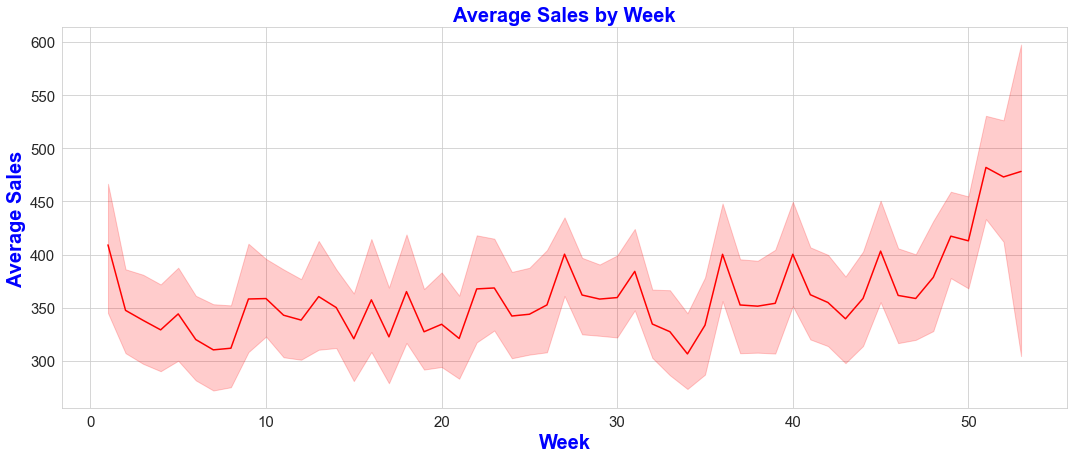

In [519]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Week", y = "Average Sales", data = sales, color = "red")
plt.title("Average Sales by Week", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Week", size = 20, color = "blue", weight = "bold")
plt.ylabel("Average Sales", size = 20, color = "blue", weight = "bold")
plt.show()

**Average Sales by Month**

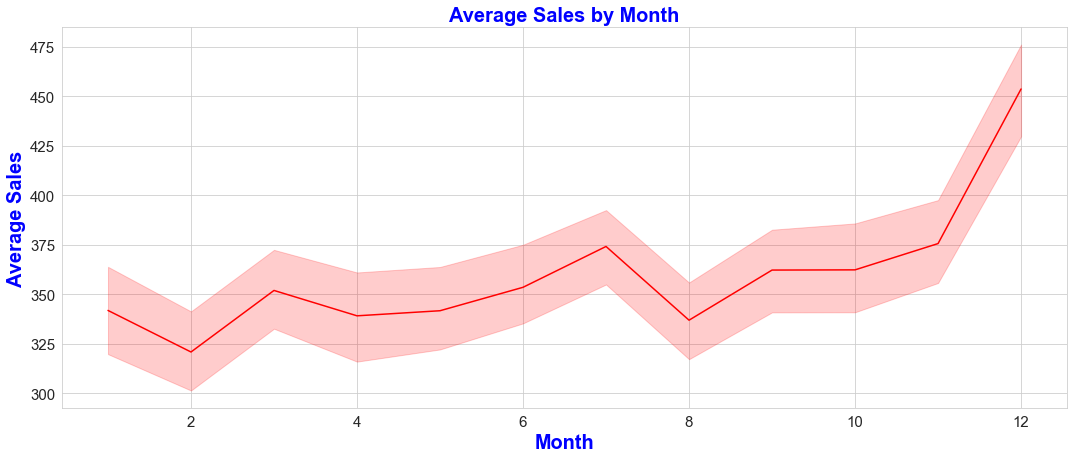

In [520]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "Month", y = "Average Sales", data = sales, color = "red")
plt.title("Average Sales by Month", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Month", size = 20, color = "blue", weight = "bold")
plt.ylabel("Average Sales", size = 20, color = "blue", weight = "bold")
plt.show()

### Flue Visits

In [521]:
df = pd.read_csv("flu-trends.csv")
df.set_index(pd.PeriodIndex(df.Week, freq="W"), inplace=True)
df.drop("Week", axis=1, inplace=True)
df.head(3)

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132


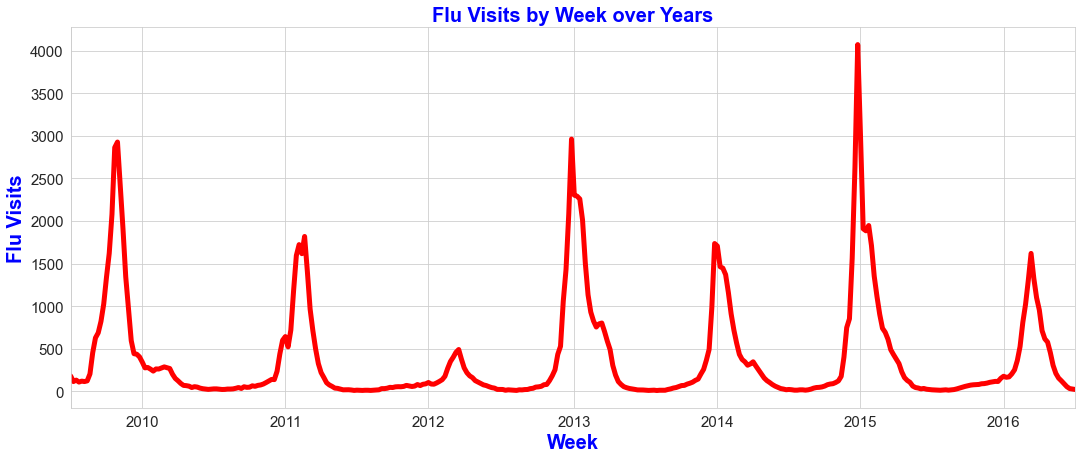

In [522]:
fig, ax = plt.subplots(figsize = (18, 7))
df["FluVisits"].plot(ax=ax, color = "red", linewidth = 5)
plt.title("Flu Visits by Week over Years", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Week", size = 20, color = "blue", weight = "bold")
plt.ylabel("Flu Visits", size = 20, color = "blue", weight = "bold")
plt.show()

**Predictions**

In [523]:
df["Lag 1"] = df["FluVisits"].shift(1)
df["Lag 2"] = df["FluVisits"].shift(2)
df["Lag 3"] = df["FluVisits"].shift(3)
df["Lag 4"] = df["FluVisits"].shift(4)

In [524]:
X = df[["Lag 1", "Lag 2", "Lag 3", "Lag 4"]]
X = X.fillna(0)
y = df["FluVisits"]

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    shuffle = False)

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_act = pd.Series(lr.predict(X_train), index = X_train.index)
pred_for = pd.Series(lr.predict(X_test), index = X_test.index)

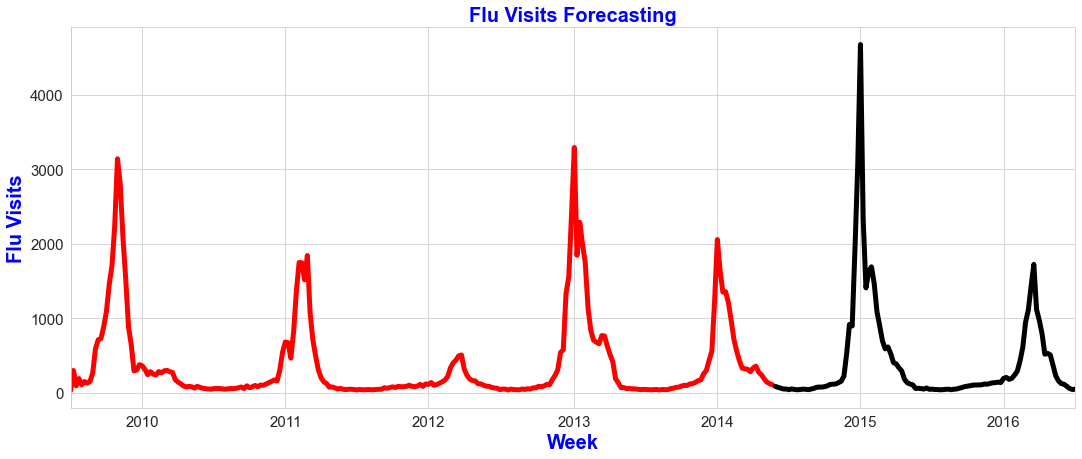

In [526]:
fig, ax = plt.subplots(figsize = (18, 7))
pred_act.plot(ax=ax, color = "red", linewidth = 5)
pred_for.plot(ax = ax, color = "black", linewidth = 5)
plt.title("Flu Visits Forecasting", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Week", size = 20, color = "blue", weight = "bold")
plt.ylabel("Flu Visits", size = 20, color = "blue", weight = "bold")
plt.show()

In [527]:
df_family = df_sales.groupby([df_sales.index, "family"])["sales"].agg(["mean"])
df_family = df_family.reset_index()
df_family

,date,family,mean
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.037037
3,2013-01-01,BEVERAGES,15.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,325.679815
55568,2017-08-15,PREPARED FOODS,85.954129
55569,2017-08-15,PRODUCE,2316.832796
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,46.851852


In [528]:
df_family["Month"] = df_family["date"].dt.month

<AxesSubplot:xlabel='Month', ylabel='family'>

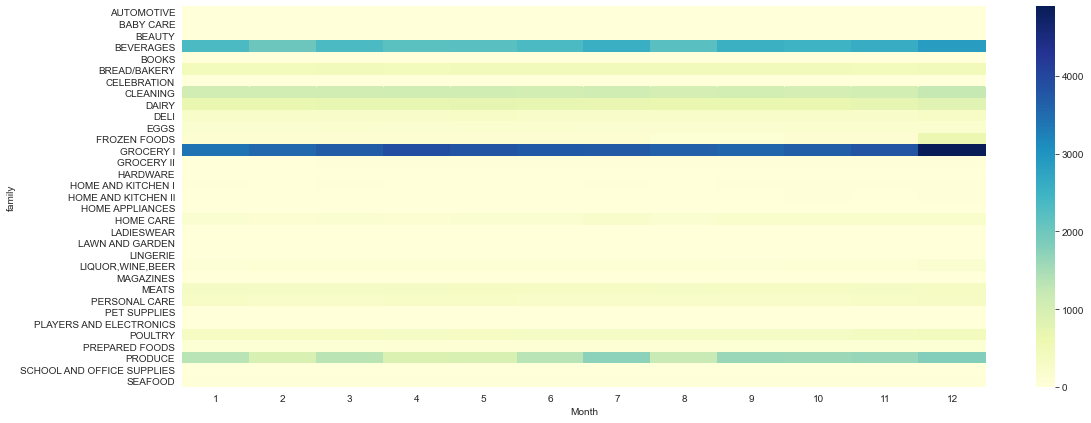

In [529]:
plt.figure(figsize = (18, 7))
sns.heatmap(pd.pivot_table(df_family, index = "family", columns = "Month", values = "mean"), cmap="YlGnBu")

### Hybrid Models

In [531]:
df_us = pd.read_csv("us-retail-sales.csv", index_col = "Month", parse_dates = ["Month"])
df_us.head()

,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
Month,,,,,,
1992-01-01,6938,3657,29589,26788,14996,8964
1992-02-01,7524,3490,28570,28203,16015,9023
1992-03-01,8475,3669,29682,31684,17984,10608
1992-04-01,9401,3527,30228,32547,18872,11630
1992-05-01,9558,3571,31677,32883,20037,12327


In [534]:
df_fb = df_us[["FoodAndBeverage", "BuildingMaterials"]]
df_fb.head(5)

,FoodAndBeverage,BuildingMaterials
Month,,
1992-01-01,29589,8964
1992-02-01,28570,9023
1992-03-01,29682,10608
1992-04-01,30228,11630
1992-05-01,31677,12327


In [535]:
dp = DeterministicProcess(index = df_fb.index,
                          constant = True,
                          order = 2,
                          drop = True)

X = dp.in_sample()

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    df_fb["FoodAndBeverage"],
                                                    test_size = 0.3,
                                                    shuffle = False)

lr = LinearRegression(fit_intercept = False)

lr.fit(X_train, y_train)

pred_tr = pd.DataFrame(lr.predict(X_train), 
                       index = X_train.index,
                       columns = ["FoodAndBeverage"])

pred_ts = pd.DataFrame(lr.predict(X_test),
                       index = X_test.index,
                       columns = ["FoodAndBeverage"])

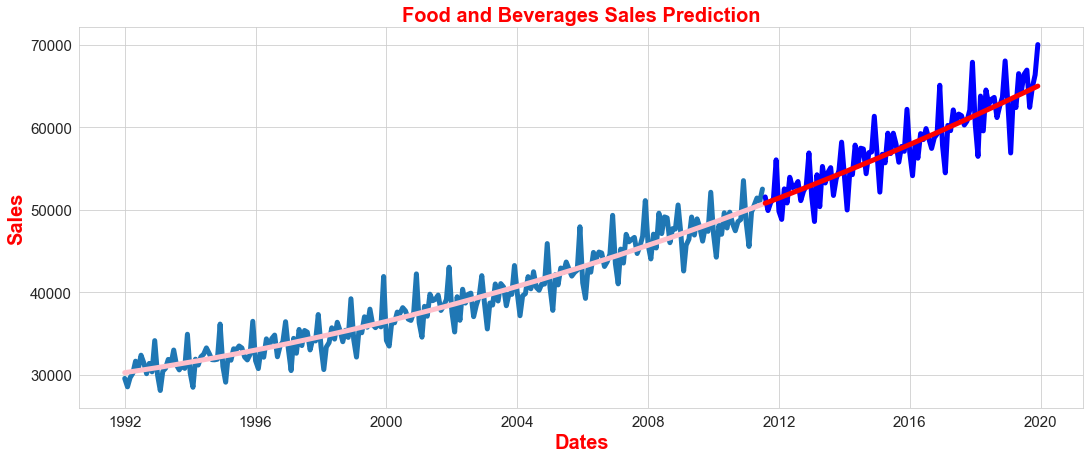

In [564]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = y_train.index, y = y_train, linewidth = 5)
sns.lineplot(x = y_test.index, y = y_test, color = "blue", linewidth = 5)
sns.lineplot(x = pred_tr.index, y = pred_tr["FoodAndBeverage"], color = "pink", linewidth = 5)
sns.lineplot(x = pred_ts.index, y = pred_ts["FoodAndBeverage"], color = "red", linewidth = 5)
plt.title("Food and Beverages Sales Prediction", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Dates", size = 20, color = "red", weight = "bold")
plt.ylabel("Sales", size = 20, color = "red", weight = "bold")
plt.show()